<a href="https://colab.research.google.com/github/BISWAJIT69K/Health-And-Fitness-Recommendations-System/blob/main/fitness_recomendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the Exercise dataset
exercise_data = pd.read_csv('exercise.csv')

# Display the first few rows of the dataset to confirm successful loading
print(exercise_data.head())


   ID     Exercise  Calories Burn  Dream Weight  Actual Weight  Age  Gender  \
0   1   Exercise 2     286.959851     91.892531      96.301115   45    Male   
1   2   Exercise 7     343.453036     64.165097      61.104668   25    Male   
2   3   Exercise 4     261.223465     70.846224      71.766724   20    Male   
3   4   Exercise 5     127.183858     79.477008      82.984456   33    Male   
4   5  Exercise 10     416.318374     89.960226      85.643174   29  Female   

   Duration  Heart Rate        BMI Weather Conditions  Exercise Intensity  
0        37         170  29.426275              Rainy                   5  
1        43         142  21.286346              Rainy                   5  
2        20         148  27.899592             Cloudy                   4  
3        39         170  33.729552              Sunny                  10  
4        34         118  23.286113             Cloudy                   3  


In [2]:
# Display the columns of the dataset
print("Exercise Data Columns:", exercise_data.columns.tolist())

# Display data types
print("Data Types:\n", exercise_data.dtypes)

# Display basic statistics
print("Basic Statistics:\n", exercise_data.describe())


Exercise Data Columns: ['ID', 'Exercise', 'Calories Burn', 'Dream Weight', 'Actual Weight', 'Age', 'Gender', 'Duration', 'Heart Rate', 'BMI', 'Weather Conditions', 'Exercise Intensity']
Data Types:
 ID                      int64
Exercise               object
Calories Burn         float64
Dream Weight          float64
Actual Weight         float64
Age                     int64
Gender                 object
Duration                int64
Heart Rate              int64
BMI                   float64
Weather Conditions     object
Exercise Intensity      int64
dtype: object
Basic Statistics:
                 ID  Calories Burn  Dream Weight  Actual Weight          Age  \
count  3864.000000    3864.000000   3864.000000    3864.000000  3864.000000   
mean   1932.500000     301.861806     75.139263      75.188440    39.621118   
std    1115.585048     115.828604     14.545824      14.845511    12.521721   
min       1.000000     100.009403     50.001984      45.783747    18.000000   
25%     966.7

In [3]:
# Check for missing values
missing_values = exercise_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Optionally, fill or drop missing values
# exercise_data.fillna(method='ffill', inplace=True)  # Example to fill missing values
# exercise_data.dropna(inplace=True)  # Example to drop rows with missing values


Missing Values:
 ID                    0
Exercise              0
Calories Burn         0
Dream Weight          0
Actual Weight         0
Age                   0
Gender                0
Duration              0
Heart Rate            0
BMI                   0
Weather Conditions    0
Exercise Intensity    0
dtype: int64


In [4]:
# Example: Categorizing exercise intensity based on Heart Rate or Duration
def intensity_category(row):
    if row['Heart Rate'] > 140:
        return 'High'
    elif row['Heart Rate'] > 100:
        return 'Medium'
    else:
        return 'Low'

exercise_data['Intensity Category'] = exercise_data.apply(intensity_category, axis=1)


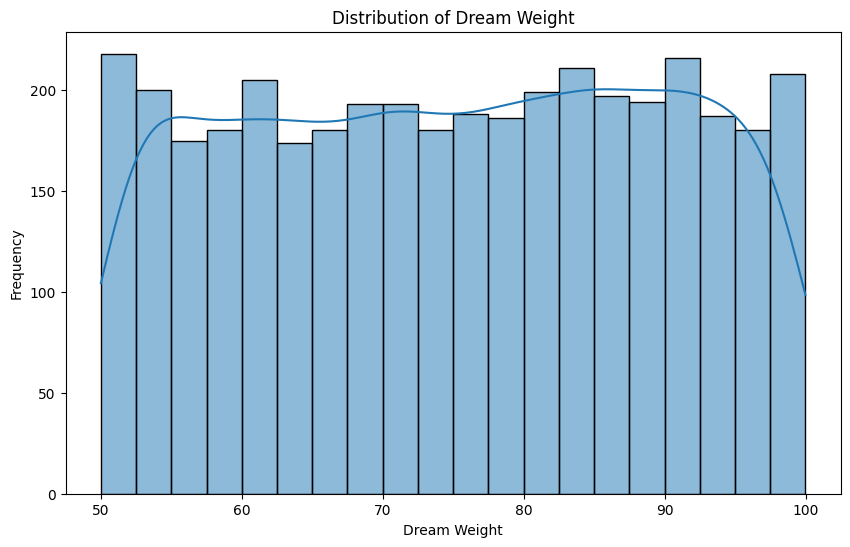

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Plotting the distribution of Dream Weight
plt.figure(figsize=(10, 6))
sns.histplot(exercise_data['Dream Weight'], bins=20, kde=True)
plt.title('Distribution of Dream Weight')
plt.xlabel('Dream Weight')
plt.ylabel('Frequency')
plt.show()


In [6]:
# Example: Generate recommendations based on BMI
def fitness_recommendation(row):
    if row['BMI'] < 18.5:
        return "Consider a weight gain plan."
    elif 18.5 <= row['BMI'] < 24.9:
        return "Maintain your current fitness routine."
    elif 25 <= row['BMI'] < 29.9:
        return "Consider a weight loss plan."
    else:
        return "Consult a healthcare provider for weight management."

exercise_data['Recommendation'] = exercise_data.apply(fitness_recommendation, axis=1)


In [7]:
# Display the dataset with recommendations
print(exercise_data[['ID', 'Exercise', 'Dream Weight', 'Actual Weight', 'Age', 'Gender', 'BMI', 'Recommendation']])

# Optionally save to CSV
exercise_data.to_csv('exercise_recommendations.csv', index=False)


        ID     Exercise  Dream Weight  Actual Weight  Age  Gender        BMI  \
0        1   Exercise 2     91.892531      96.301115   45    Male  29.426275   
1        2   Exercise 7     64.165097      61.104668   25    Male  21.286346   
2        3   Exercise 4     70.846224      71.766724   20    Male  27.899592   
3        4   Exercise 5     79.477008      82.984456   33    Male  33.729552   
4        5  Exercise 10     89.960226      85.643174   29  Female  23.286113   
...    ...          ...           ...            ...  ...     ...        ...   
3859  3860   Exercise 5     98.147291      96.745133   20  Female  32.447764   
3860  3861   Exercise 4     97.598957      92.700573   21  Female  26.602475   
3861  3862   Exercise 4     94.946612      96.778936   57    Male  31.435348   
3862  3863   Exercise 9     64.743906      68.662889   58  Female  19.774614   
3863  3864   Exercise 7     56.757424      59.833403   35    Male  29.581330   

                                       

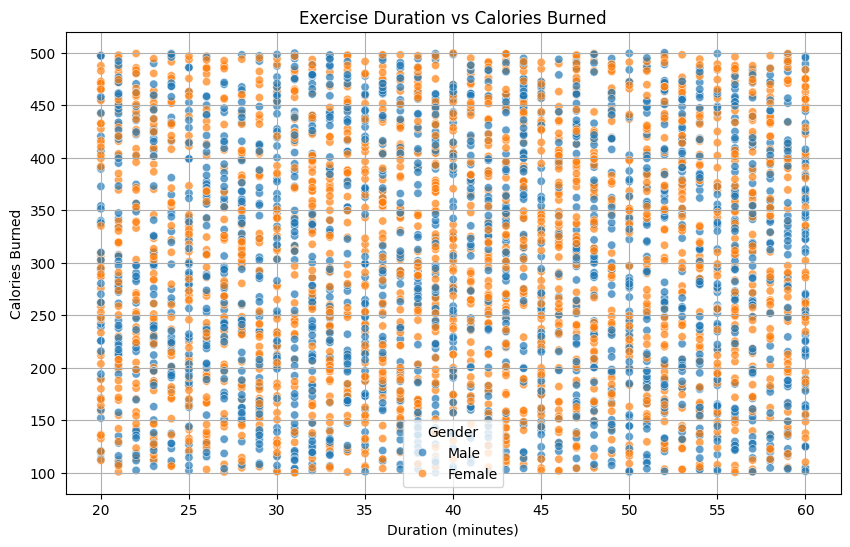

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=exercise_data, x='Duration', y='Calories Burn', hue='Gender', alpha=0.7)
plt.title('Exercise Duration vs Calories Burned')
plt.xlabel('Duration (minutes)')
plt.ylabel('Calories Burned')
plt.legend(title='Gender')
plt.grid()
plt.show()


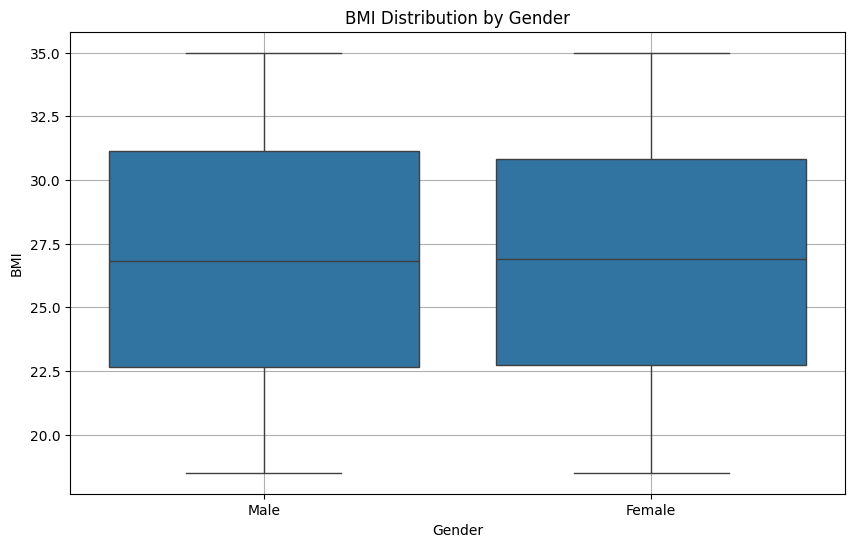

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=exercise_data, x='Gender', y='BMI')
plt.title('BMI Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.grid()
plt.show()


In [12]:
def get_user_input():
    print("Enter your details for personalized fitness recommendations.")
    name = input("Name: ")
    age = int(input("Age: "))
    gender = input("Gender (Male/Female): ")
    actual_weight = float(input("Actual Weight (kg): "))

    # Example: You can use the average BMI for recommendations
    average_bmi = exercise_data['BMI'].mean()
    print(f"Average BMI from dataset: {average_bmi}")

    # Generate a simple recommendation based on user inputs
    if actual_weight > 75:  # This threshold can be adjusted based on your criteria
        print("Recommendation: Consider a weight loss plan.")
    else:
        print("Recommendation: Maintain your current fitness routine.")

    return {
        "Name": name,
        "Age": age,
        "Gender": gender,
        "Actual Weight": actual_weight,
        "Average BMI": average_bmi
    }

# Call the function to get user input
user_info = get_user_input()


Enter your details for personalized fitness recommendations.
Name: biswaa
Age: 19
Gender (Male/Female): male
Actual Weight (kg): 78
Average BMI from dataset: 26.801976636759836
Recommendation: Consider a weight loss plan.


In [13]:
# Preparing the dataset for training a regression model
X = exercise_data[['Age', 'Duration', 'Heart Rate', 'BMI']]
y = exercise_data['Calories Burn']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)

# Display evaluation metrics
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')


Mean Squared Error: 13240.375879916002
R^2 Score: -0.0009714931701527707


In [14]:
def enhanced_recommendation(user_info, model):
    # Example prediction for calories burned
    user_data = pd.DataFrame({
        'Age': [user_info['Age']],
        'Duration': [30],  # Assuming 30 minutes for prediction
        'Heart Rate': [120],  # Assuming a heart rate of 120
        'BMI': [user_info['Average BMI']]
    })

    predicted_calories = model.predict(user_data)[0]
    print(f"Based on your details, you can burn approximately {predicted_calories:.2f} calories in 30 minutes of exercise.")

    if predicted_calories > 300:
        print("Recommendation: Great job! Keep pushing your limits.")
    else:
        print("Recommendation: Consider increasing your workout duration or intensity.")

# Call the function to get enhanced recommendations
enhanced_recommendation(user_info, model)


Based on your details, you can burn approximately 300.96 calories in 30 minutes of exercise.
Recommendation: Great job! Keep pushing your limits.


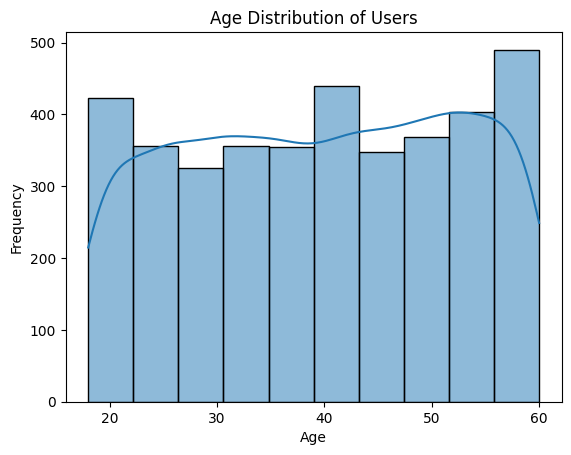

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example visualization: Age distribution of users
sns.histplot(exercise_data['Age'], bins=10, kde=True)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
